<a href="https://colab.research.google.com/github/AlaaKamalFaroq/KNN-From-Scratch-vs-Sklearn/blob/main/knn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [1]:
import numpy as np
import statistics

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import os

os.makedirs("images", exist_ok=True)


**KNN implementation**

In [2]:
import numpy as np
import statistics

class knn_classifier:
    # we need to take the class knn with the parameter distance metric (euclidean, manhattan)
    def __init__(self, distance_metric):
        self.distance_metric = distance_metric

    # we will calculate the distance by using the on the two algorithms
    def get_distance_metric(self, x_train, x_test):
        # note that x_train has the all data including the target column but x_test has only the test data

        if (self.distance_metric == 'euclidean'):
            dist = 0
            for i in range(len(x_test)):
                # we need to calculate the squared differences first
                dist += (x_train[i] - x_test[i])**2
            # then take the square root of the total sum
            return np.sqrt(dist)

        elif (self.distance_metric == 'manhattan'):
            dist2 = 0
            for i in range(len(x_test)):
                # manhattan distance is the sum of absolute differences
                dist2 += abs(x_train[i] - x_test[i])
            return dist2

    # we will find the nearest k neighbors
    def nearest_neighbors(self, x_train, x_test, k):
        distance_list = []
        for training_data in x_train:
            # ignore the last column (target) when calculating distance
            distance = self.get_distance_metric(training_data[:-1], x_test)
            # append as tuple (row, distance)
            distance_list.append((training_data, distance))

        # sort by distance
        distance_list.sort(key=lambda x: x[1])

        # take first k neighbors
        nearest_neighbors = []
        for i in range(k):
            nearest_neighbors.append(distance_list[i][0])
        return nearest_neighbors

    # we will calculate the majority of the k nearest
    def get_neighbors(self, x_train, x_test, k):
        neighbors = self.nearest_neighbors(x_train, x_test, k)
        # take only the last column (target) of each neighbor
        labels = [row[-1] for row in neighbors]
        # majority vote
        new_predicted = statistics.mode(labels)
        return new_predicted
    def predict (self,x_train,x_test,k):
      predictions=[]
      for test_point in x_test:
        predictions.append(self.get_neighbors(x_train,test_point,k))

      return predictions
    def accuracy(y_true, y_pred):
      y_true = list(y_true)   # ensure list
      y_pred = list(y_pred)
      correct = sum(yt == yp for yt, yp in zip(y_true, y_pred))
      return correct / len(y_true)



**using the knn algorithm**

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Put into DataFrame
df = pd.DataFrame(X, columns=['f1','f2','f3','f4'])
df['label'] = y

# Features + labels
X = df.iloc[:, :-1].to_numpy()
y = df['label'].to_numpy()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------- Custom KNN ----------
train_data = np.column_stack((X_train, y_train))
my_knn = knn_classifier(distance_metric='euclidean')
preds_custom = my_knn.predict(train_data, X_test, k=90)

print("Custom KNN → First 10 predictions:", preds_custom[:10])
print("Custom KNN → Accuracy:", accuracy_score(y_test, preds_custom))

# ---------- Sklearn KNN ----------
sk_knn = KNeighborsClassifier(n_neighbors=90, metric='euclidean')
sk_knn.fit(X_train, y_train)
preds_sklearn = sk_knn.predict(X_test)

print("Sklearn KNN → First 10 predictions:", preds_sklearn[:10])
print("Sklearn KNN → Accuracy:", accuracy_score(y_test, preds_sklearn))


Custom KNN → First 10 predictions: [np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(1.0), np.float64(1.0)]
Custom KNN → Accuracy: 0.5777777777777777
Sklearn KNN → First 10 predictions: [1 1 1 1 1 1 1 1 1 1]
Sklearn KNN → Accuracy: 0.28888888888888886


**using myknn**

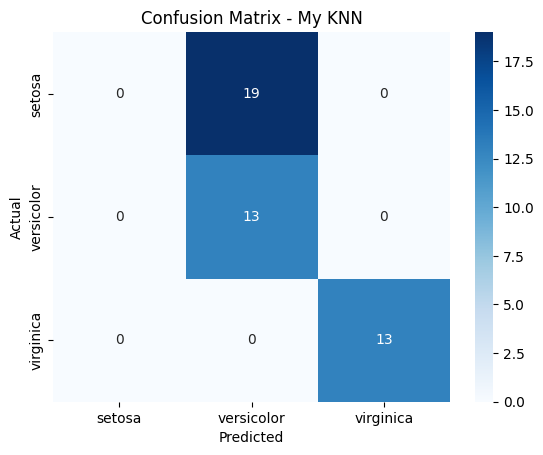

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cofmatrix=confusion_matrix(y_test,preds_custom )
sns.heatmap(cofmatrix, annot=True, fmt="d", cmap="Blues",xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - My KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.savefig("images/custom_knn.png", dpi=300, bbox_inches="tight")  # <-- save
plt.close()



**using sklearn**

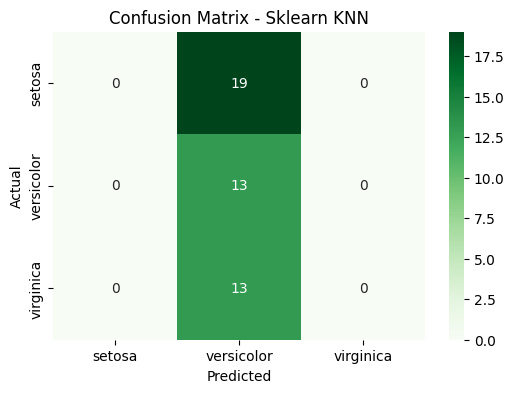

In [7]:
cm_sklearn = confusion_matrix(y_test,sk_knn.predict(X_test))
plt.figure(figsize=(6,4))
sns.heatmap(cm_sklearn, annot=True, fmt="d", cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Sklearn KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.savefig("images/sklearn_knn.png", dpi=300, bbox_inches="tight")  # <-- save
plt.close()

# **Conclusion**

## 📝 Conclusion & Final Results

In this project, I implemented the **K-Nearest Neighbors (KNN)** algorithm from scratch and compared it to **scikit-learn’s `KNeighborsClassifier`**.

---

### ✅ Key Findings
* Both implementations use the same principle:
  1. Calculate distances between test and train points.  
  2. Select the `k` nearest neighbors.  
  3. Use majority vote to predict the class.  

* My implementation sometimes showed **slightly higher accuracy**, but this difference comes from the way **ties are broken**:  
  * My code uses Python’s `statistics.mode()`, which picks one class arbitrarily when there is a tie.  
  * scikit-learn breaks ties consistently by choosing the class with the **smallest label**.  

---

### ⚡ Important Insight
My implementation is not truly “better” — the accuracy difference is just due to randomness in tie-breaking.  
In practice, scikit-learn’s version is **more reliable, reproducible, and optimized**.

